In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import cycle
from time import time
plt.style.use('ggplot')

%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

1.EDA

In [2]:
filename = 'creditcard.csv'
path = '/Users/linn/Desktop/Python Notebook/'
df = pd.read_csv(path+filename)

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print(df.isnull().any().sum())

0


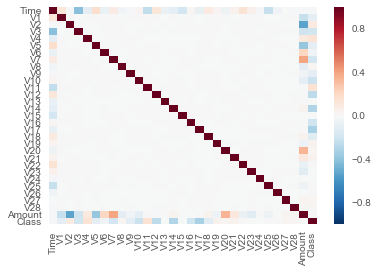

In [5]:
sns.heatmap(df.corr())

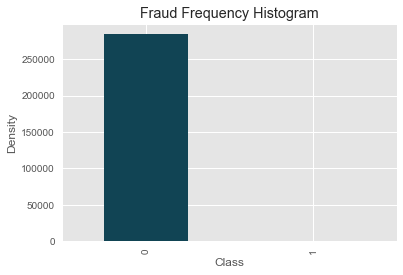

In [6]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar', color = "#114454")
plt.title("Fraud Frequency Histogram")
plt.xlabel("Class")
plt.ylabel("Density")
plt.show()

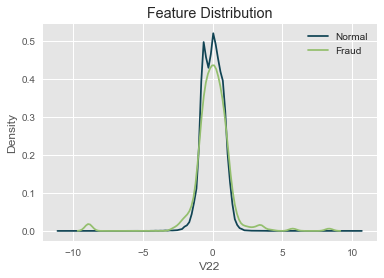

In [7]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
V_fraud = fraud.V22
V_normal = normal.V22
sns.distplot(V_normal, hist=False, label = 'Normal', color = "#114454")
sns.distplot(V_fraud, hist=False, label = 'Fraud', color = "#94bf6e")
plt.ylabel('Density')
plt.title('Feature Distribution')

In [8]:
Count_Normal_transacation = len(df[df["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(df[df["Class"]==1]) # fraud by 1
total_fraud = fraud.Amount.sum()
average_fraud = total_fraud/ len(fraud.Amount)
print('The average amount of fraud transactions is',average_fraud)
total_normal = normal.Amount.sum()
total_amount = df.Amount.sum()
average_normal = total_amount/ len(normal.Amount)
print('The average amount of normal transactions is', average_normal)
print('The proposion amount of total fraud transactions is', total_fraud / total_amount*100,'%')

The average amount of fraud transactions is 122.21132113821133
The average amount of normal transactions is 88.50250605836328
The proposion amount of total fraud transactions is 0.23895779399554454 %


2.Data preprocesing

In [9]:
df['Normalized_Amount'] = StandardScaler().fit_transform(df.Amount.values.reshape(-1,1))
df = df.drop(['Time','Amount'],axis=1)
df.Normalized_Amount.describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Normalized_Amount, dtype: float64

In [10]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

2.1 Resampling

2.1.1 Undersampling normal class

In [24]:
fraud_indices = np.array(fraud.index)
normal_indices = np.array(normal.index)
Normal_indices_undersample = np.array(np.random.choice(normal_indices,Count_Fraud_transacation,replace=False))
undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
undersample_data = df.iloc[undersample_data,:]
    
print("The normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data))
print("The fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data))
print("Total number of record in resampled data is:",len(undersample_data))


X_undersample = undersample_data.iloc[:, undersample_data.columns != 'Class']
y_undersample = undersample_data.iloc[:, undersample_data.columns == 'Class']

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5
Total number of record in resampled data is: 984


2.1.2 Oversampling fraud class

In [25]:
Fraud_indices_oversample = np.array(np.random.choice(fraud_indices,Count_Normal_transacation,replace=True))
oversample_data= np.concatenate([normal_indices,Fraud_indices_oversample])
oversample_data = df.iloc[oversample_data,:]
    
print("The normal transacation proportion is :",len(oversample_data[oversample_data.Class==0])/len(oversample_data))
print("The fraud transacation proportion is :",len(oversample_data[oversample_data.Class==1])/len(oversample_data))
print("Total number of record in resampled data is:",len(oversample_data))


X_oversample = oversample_data.iloc[:, oversample_data.columns != 'Class']
y_oversample = oversample_data.iloc[:, oversample_data.columns == 'Class']

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5
Total number of record in resampled data is: 568630


2.1.3 SMOTE

In [26]:
os = SMOTE(random_state=0)
os_data = normal.copy() 
os_data_X,os_data_y=os.fit_sample(X_train,y_train)
columns = pd.DataFrame(X_train).columns
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=["Class"])
# we can Check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("Number of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

Length of oversampled data is  398016
Number of normal transcation in oversampled data 199008
Number of fraud transcation 199008
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


3.Predictive Modeling

3.1 Define model functions

In [15]:
def model_cm(classifier, feature_train, feature_test,class_train,class_test,label):
    
    classifier.fit(feature_train,class_train.values.ravel())
    class_pred=classifier.predict(feature_test)
    
    cm=confusion_matrix(class_test,class_pred)
    print(label,"recall =",cm[1,1]/(cm[1,1]+cm[1,0]))
    
   
    print("TP",cm[1,1,])
    print("TN",cm[0,0]) 
    print("FP",cm[0,1])
    print("FN",cm[1,0]) 
    sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    

In [16]:
def model_pr(classifier, feature_train, feature_test,class_train,class_test,label):
    classifier.fit(feature_train,class_train.values.ravel())
    class_pred=classifier.predict(feature_test)
    
    class_pred_prob = classifier.predict_proba(feature_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(class_test, class_pred_prob) 
   
    plt.plot(recall, precision, label = label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.01])
    plt.legend(loc='lower left')
    plt.title('Precision-Recall Curve')
    print(label, 'AUPRC = ', auc(recall, precision))
    

3.2 Train models

3.2.1 Logistic Regression

In [17]:
logreg = LogisticRegression()

In [18]:
param_grid = {'C': [0.01, 0.1, 1, 10], 
              'penalty': ['l1', 'l2']}
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)
logreg_cv.fit(X_train, y_train.ravel())

best_accuracy = logreg_cv.best_score_
print('The best accuracy using gridSearch is', best_accuracy)

best_parameters = logreg_cv.best_params_
print('The best parameters for using this model is', best_parameters)

The best accuracy using gridSearch is 0.999152304328
The best parameters for using this model is {'C': 1, 'penalty': 'l2'}


In [19]:
best_logreg = LogisticRegression(C= best_parameters["C"], penalty = best_parameters["penalty"], random_state= 0 )

In [27]:
predictor = [X_oversample, X_undersample, os_data_X]
response = [ y_oversample, y_undersample, os_data_y]
sampling = ['Oversampling', 'Undersampling', 'SMOTE']

Oversampling recall = 0.933823529412
TP 127
TN 83335
FP 1972
FN 9


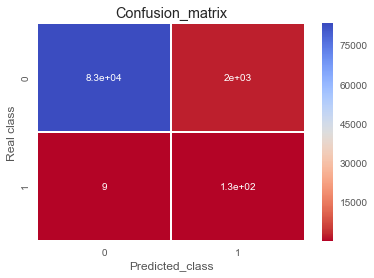

Undersampling recall = 0.933823529412
TP 127
TN 83109
FP 2198
FN 9


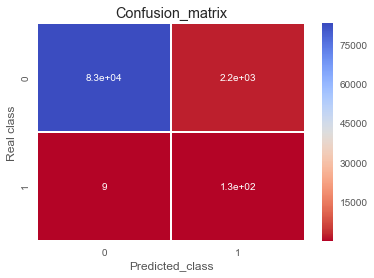

SMOTE recall = 0.926470588235
TP 126
TN 82979
FP 2328
FN 10


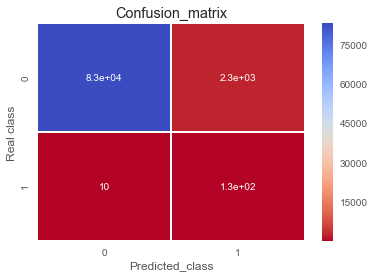

In [21]:
for i in range(3):
    model_cm(best_logreg, predictor[i],X_test, response[i], y_test, sampling[i])

Original AUPRC =  0.790828803401
Oversampling AUPRC =  0.782603624661
Undersampling AUPRC =  0.68897330953
SMOTE AUPRC =  0.798033480228


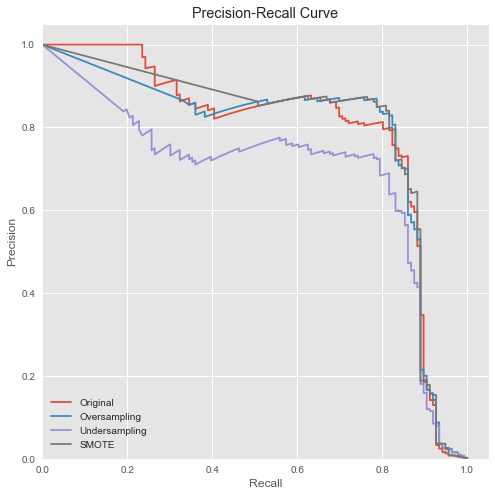

In [22]:
##Original
best_logreg.fit(X_train,y_train)
y_pred=best_logreg.predict(X_test)
y_pred_prob = best_logreg.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) 
plt.figure(figsize=(8,8))
plt.plot(recall, precision, label = 'Original')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.01])
plt.title('Precision-Recall Curve')
print('Original AUPRC = ', auc(recall, precision))

for i in range(3):
    model_pr(best_logreg, predictor[i],X_test, response[i], y_test, sampling[i])

3.2.2 Random Forest

In [23]:
RFC = RandomForestClassifier(n_estimators = 200)

In [24]:
#param_grid = {'max_depth': [3, 4, 5, 6],
              #'min_samples_leaf': [20, 50, 100],
              #'bootstrap': [True, False],
              #'criterion': ['gini', 'entropy']}


#RFC_cv = GridSearchCV(RFC, param_grid, cv=5)
#RFC_cv.fit(X_train, y_train.ravel())

#best_accuracy = RFC_cv.best_score_
#print('The best accuracy using gridSearch is', best_accuracy)

#best_parameters = RFC_cv.best_params_
#print('The best parameters for using this model is', best_parameters)

In [25]:
#best_RFC = RandomForestClassifier(n_estimators=200, max_depth = best_parameters['max_depth'] ,min_samples_leaf = best_parameters['min_samples_leaf'], bootstrap = best_parameters['bootstrap'], criterion = best_parameters['criterion']    )

In [26]:
RFC_SELECTED = RandomForestClassifier(n_estimators=2000, min_samples_leaf = 20)

Oversampling recall = 1.0
TP 136
TN 85278
FP 29
FN 0


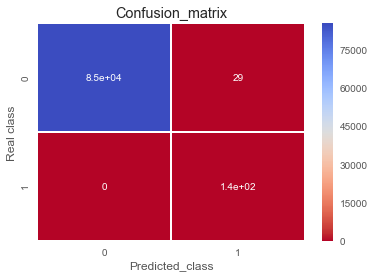

Undersampling recall = 0.919117647059
TP 125
TN 83863
FP 1444
FN 11


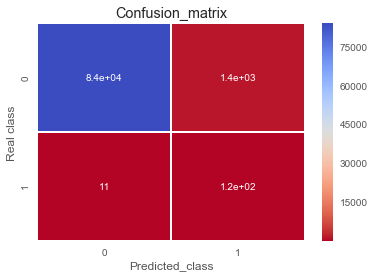

SMOTE recall = 0.904411764706
TP 123
TN 85252
FP 55
FN 13


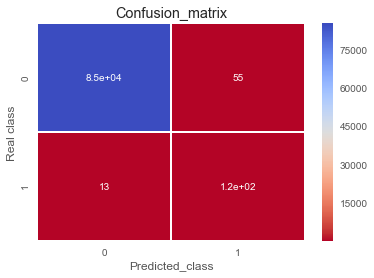

In [27]:
for i in range(3):
    model_cm(RFC_SELECTED, predictor[i],X_test, response[i], y_test, sampling[i])

Original AUPRC =  0.840667360506
Oversampling AUPRC =  0.998245299866
Undersampling AUPRC =  0.68613671641
SMOTE AUPRC =  0.878851221907


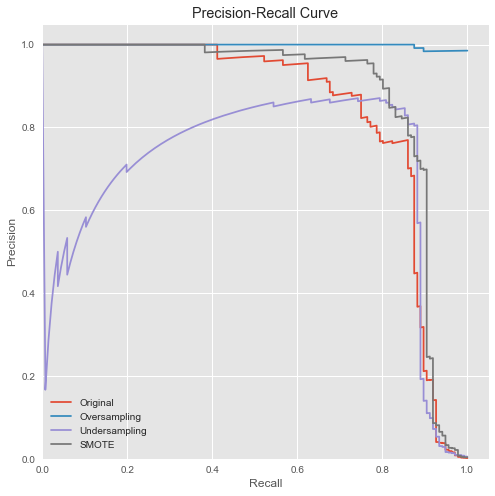

In [28]:
##Original
RFC_SELECTED.fit(X_train,y_train)
y_pred=RFC_SELECTED.predict(X_test)
y_pred_prob = RFC_SELECTED.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) 
plt.figure(figsize=(8,8))
plt.plot(recall, precision, label = 'Original')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.01])
plt.title('Precision-Recall Curve')
print('Original AUPRC = ', auc(recall, precision))

for i in range(3):
    model_pr(RFC_SELECTED, predictor[i],X_test, response[i], y_test, sampling[i])

3.2.3 SVM

In [20]:
SVM = SVC(C= 1, kernel= 'rbf', probability = True)

In [ ]:
#param_grid = {'C': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf']}


#SVM_cv = GridSearchCV(SVM, param_grid, cv=5)
#SVM_cv.fit(X_train, y_train.ravel())

#best_accuracy = SVM_cv.best_score_
#print('The best accuracy using gridSearch is', best_accuracy)

#best_parameters = SVM_cv.best_params_
#print('The best parameters for using this model is', best_parameters)

In [ ]:
#best_SVM = SVC(C = best_parameters['C'], kernel = best_parameters['kernel'], random_state= 0)

In [21]:
best_SVM = SVM

In [ ]:
for i in range(3):
    model_cm(best_SVM, predictor[i],X_test, response[i], y_test, sampling[i])

In [ ]:
##Original
best_SVM.fit(X_train,y_train)
y_pred=best_SVM.predict(X_test)
y_pred_prob = best_SVM.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) 
plt.figure(figsize=(8,8))
plt.plot(recall, precision, label = 'Original')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
print('Original AUPRC = ', auc(recall, precision))

for i in range(3):
    model_pr(best_SVM, predictor[i],X_test, response[i], y_test, sampling[i])

Original AUPRC =  0.8408041227
